In [3]:
%load_ext ipydex.displaytools

In [4]:
import sympy as sp
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sympy import I as j
from sympy import latex


In [5]:
import plotly.io as pio
pio.templates
pio.templates.default='ggplot2'

In [6]:
s, w = sp.symbols('s, w')

In [7]:
P = sp.exp(-0.05*s) / (0.25*s - 1) ##:
C = (15*s + 1) / (4.5*s) ##:

P := exp(-0.05*s)/(0.25*s - 1)

---


C := 0.222222222222222*(15*s + 1)/s

---


In [8]:
sys = P*C / (1+P*C)
sys = sp.simplify(sys)
sys = sys.subs(s, j*w) ##:
sys = sp.lambdify(w, sys)
sysv = np.vectorize(sys)

sys := (3.33333333333333*I*w + 0.222222222222222)/(I*w*(0.25*I*w - 1)*exp(0.05*I*w) + 3.33333333333333*I*w + 0.222222222222222)

---


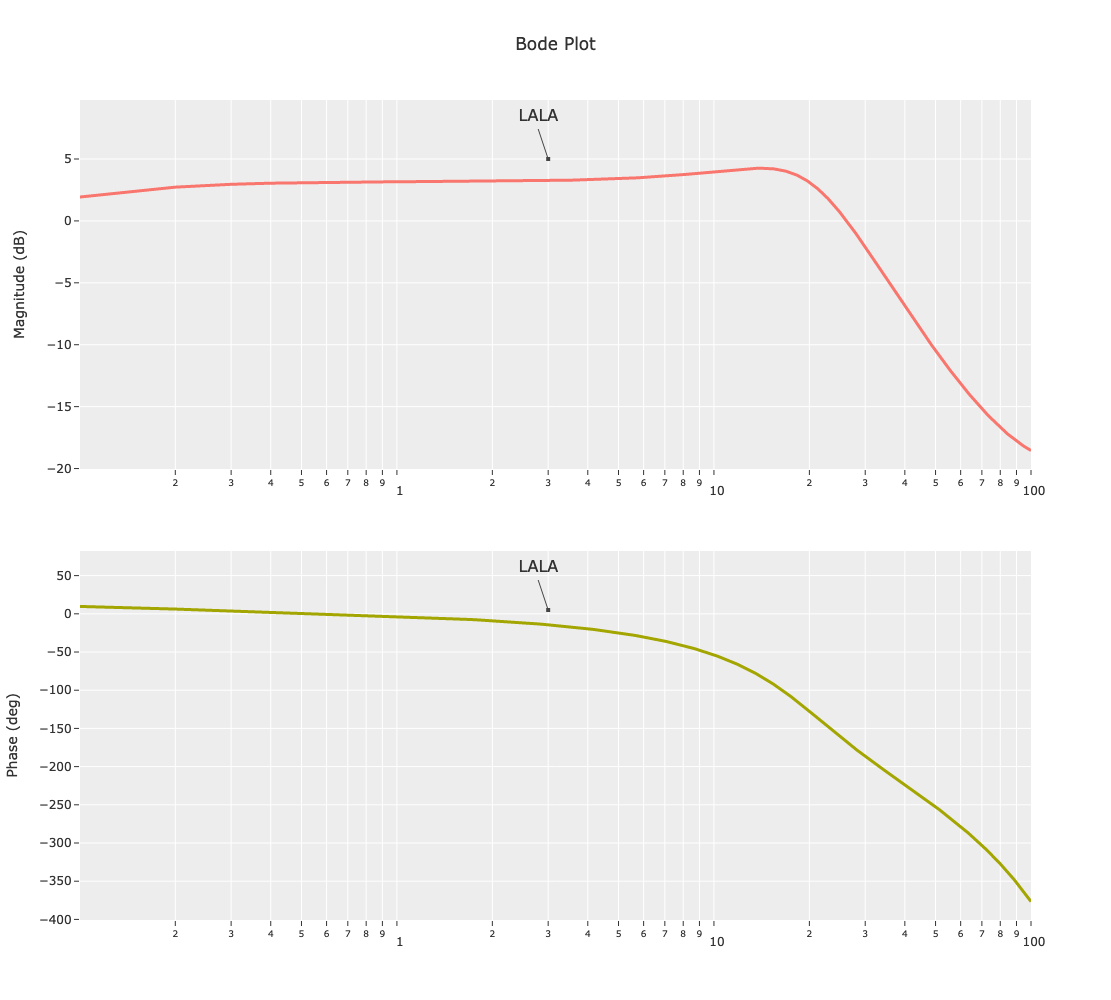

In [14]:
w = np.linspace(0, 10**2, 1000)

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Magnitude", "Phase"),
    vertical_spacing = 0.1
)

sys_db = 20*np.log10(np.abs(sysv(w)))
sys_phase = np.rad2deg(np.unwrap(np.angle(sysv(w))))


fig.add_trace(
    go.Scatter(
        x=w,
        y=sys_db,
        name='Magnitude',
        line_width=3
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=w,
        y=sys_phase,
        name='Phase',
        line_width=3
    ),
    row=2, col=1
)

fig.update_xaxes(
    title_text='Frequency ($\omega$)',
    type='log',
    row=1, col=1
)

fig.update_xaxes(
    title_text='Frequency ($\omega$)',
    type='log',
    row=2, col=1
)

fig.update_yaxes(
    title_text='Magnitude (dB)',
    row=1, col=1
)

fig.update_yaxes(
    title_text='Phase (deg)',
    row=2, col=1
)

fig.update_layout(
    title_text="Bode Plot",
    height=1000,
    showlegend=False,
    clickmode='select',
    annotations=[
        dict(
        x=np.log10(3),
        y=5,
        text='LALA',
        xref="x1",
        yref="y1",
        showarrow=True,
        arrowhead=7,

    ),
    dict(
        x=np.log10(3),
        y=5,
        text='LALA',
        xref="x2",
        yref="y2",
        showarrow=True,
        arrowhead=7,

    ),
        
    ]
)


